In [1]:

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import pyproj
import geopandas as gpd

## Flow of steel in the Gauteng Economy

In [ ]:
df = pd.read_csv("20251111_133858409564_IIOT.csv", skiprows=7).drop(columns=["Unit", "Date"])
# df.columns = ["Output"] + [i for i in df.Output.values]
df.columns =  ["Output", "Input: Basic iron and steel products; casting of metal [QSIC 351, 353]","Input: Structural metal products [QSIC 354]","Input: Other fabricated metal products [QSIC 355]"]
# df.columns = df.columns.str.replace("Intermediate Output: ", "Input: ")
# df.Output  = df.Output.str.replace('Intermediate Output: ', 'Output: ')
df

,Output,"Input: Basic iron and steel products; casting of metal [QSIC 351, 353]",Input: Structural metal products [QSIC 354],Input: Other fabricated metal products [QSIC 355]
0,Intermediate Output: Agriculture [QSIC 11],2195.262890,135.644671,635.001714
1,Intermediate Output: Forestry [QSIC 12],2.737861,21.086855,213.563556
2,Intermediate Output: Fishing [QSIC 13],19.078735,512.574463,255.876435
3,Intermediate Output: Coal [QSIC 21],133.184768,293.798585,2422.038337
4,Intermediate Output: Gold [QSIC 23],344.049511,393.998771,3763.782777
5,Intermediate Output: Metals [QSIC 24],1350.936121,1350.172097,8851.609769
6,Intermediate Output: Other mining and quarryin...,136.602961,858.328463,1359.556657
7,Intermediate Output: Food [QSIC 301-304],6.526264,326.444102,2975.605608
8,Intermediate Output: Beverages and tobacco [QS...,23.020582,261.082983,2030.877132
9,Intermediate Output: Textiles [QSIC 311-312],17.554692,22.767618,152.108779


In [3]:
links = []
# inputs = df.columns.values[1:].tolist()
inputs = df.loc[:, ['Output', 'Input: Basic iron and steel products; casting of metal [QSIC 351, 353]']].columns.values[1:].tolist()
outputs = df.Output.values
for input in inputs:
    for output in outputs:
        val = df.loc[df.Output == output, input].values[0]
        if val > 0:
            links.append((input, output, val))

sources, targets, values = zip(*links)

nodes = inputs + [i for i in outputs]
node_indices = {node: i for i, node in enumerate(nodes)}

x_pos = {}
for n in inputs:
    x_pos[n] = 0.05
for n in outputs:
    x_pos[n] = 0.85


fig = go.Figure(data=[go.Sankey(
    # arrangement = 'fixed',
    node = dict(
        pad = 15,
        thickness = 15,
        label = nodes,
        # color = 'blue',
        x = [x_pos[n] for n in nodes]
    ),
    link = dict(
        source = [node_indices[s] for s in sources],
        target = [node_indices[t] for t in targets],
        value = values,
        # color="rgba(0,150,250,0.4)"
    )
)])

fig.update_layout(
    title_text="Use of Crude steel and steel products as an input in the South Africa Economy - 2024",
    font_size=11,
    font_family = 'Arial',
    font_color = 'black',
    annotations=[
        dict(
            text="<i>Source: CSIR Analysis based on data from Quantec.</i>",
            xref="paper", yref="paper",
            x=0, y=-0.12,          # position below chart
            showarrow=False,
            font=dict(size=10, color="black", family = 'Arial'),
            xanchor='left',
        )
    ],
    margin=dict(t=40, b=100, l=20, r=20),
    width = 900,
    height = 1000
)

fig.show()

# Auto. Man. Economic Significance

Analysis of Regional Output (in R millions)

* Data for 2019 - 2024
* Three levels: National, Provincial, and District Municipality

Source: Qauntec

In [4]:
provinces = ["Western Cape", "Eastern Cape", "Northern Cape", "North West", "Gauteng", 
             "Mpumalanga", "Limpopo", "Free State", "KwaZulu-Natal"]
district_munics = ['West Coast (DC1)',
       'Cape Winelands (DC2)', 'Overberg (DC3)', 'Eden (DC4)',
       'Central Karoo (DC5)', 'City of Cape Town (CPT)',
       'Sarah Baartman (DC10)', 'Amathole (DC12)', 'Chris Hani (DC13)',
       'Joe Gqabi (DC14)', 'O.R.Tambo (DC15)', 'Alfred Nzo (DC44)',
       'Buffalo City (BUF)', 'Nelson Mandela Bay (NMA)',
       'Namakwa (DC6)', 'Pixley ka Seme (DC7)', 'Z F Mgcawu (DC8)',
       'Frances Baard (DC9)', 'John Taolo Gaetsewe (DC45)',
       'Xhariep (DC16)', 'Lejweleputswa (DC18)',
       'Thabo Mofutsanyane (DC19)', 'Fezile Dabi (DC20)',
       'Mangaung (MAN)', 'Ugu (DC21)',
       'UMgungundlovu (DC22)', 'Uthukela (DC23)', 'Umzinyathi (DC24)',
       'Amajuba (DC25)', 'Zululand (DC26)', 'Umkhanyakude (DC27)',
       'King Cetshwayo (DC28)', 'iLembe (DC29)', 'Harry Gwala (DC43)',
       'eThekwini (ETH)', 'Bojanala (DC37)',
       'Ngaka Modiri Molema (DC38)', 'Dr Ruth Segomotsi Mompati (DC39)',
       'Dr Kenneth Kaunda (DC40)', 'Sedibeng (DC42)',
       'West Rand (DC48)', 'Ekurhuleni (EKU)',
       'City of Johannesburg (JHB)', 'City of Tshwane (TSH)',
       'Gert Sibande (DC30)', 'Nkangala (DC31)',
       'Ehlanzeni (DC32)', 'Mopani (DC33)', 'Vhembe (DC34)',
       'Capricorn (DC35)', 'Waterberg (DC36)',
       'Greater Sekhukhune (DC47)']
industries = ['Agriculture', 'Forestry', 'Fishing', 'Coal', 'Gold', 'Metals',
       'Other mining and quarrying', 'Food', 'Beverages and tobacco',
       'Textiles', 'Wearing apparel', 'Leather and leather products',
       'Footwear', 'Wood and wood products', 'Paper and paper products',
       'Printing , recorded media',
       'Coke, petroleum products and nuclear fuel', 'Basic chemicals',
       'Other chemical products', 'Rubber products', 'Plastic products',
       'Glass and glass products', 'Non-metallic mineral products',
       'Basic iron and steel products; casting of metal',
       'Non-ferrous metal products', 'Structural metal products',
       'Other fabricated metal products', 'Machinery and equipment',
       'Electrical machinery',
       'Radio, television and communication apparatus',
       'Professional equipment', 'Motor vehicles, parts and accessories',
       'Other transport equipment', 'Furniture',
       'Other manufacturing groups', 'Electricity and gas', 'Water',
       'Construction', 'Wholesale and retail trade',
       'Catering and accommodation services', 'Transport and storage',
       'Communication', 'Finance and insurance',
       'Professional business services', 'Business activities n.e.c.',
       'National and Provincial government', 'Local government',
       'Education (Private)', 'Health and social work (Private)',
       'Other community, social and personal services']

In [5]:
def plot_maps(geo_df, indicator:str , industries: list):
    fig, axs = plt.subplots(1,len(industries), sharex=True, sharey=True, 
                            figsize=(4,2),
                            constrained_layout=True,
                            subplot_kw=dict(aspect='equal'),
                            dpi=300)

    if len(industries) > 1:
        axs = axs.ravel()
        for idx in range(len(industries)):
            geo_df.plot(
                column = industries[idx], 
                cmap='BuPu',
                linewidth = 0.5,
                edgecolor='black',
                ax=axs[idx],
                )
            
            cbar = plt.colorbar(axs[idx].collections[0], ax = axs[idx], location='bottom', shrink = 0.7)
            cbar.ax.set_title(f'{indicator} [R million]', fontdict={'fontsize':4}, ha='left')
            cbar.ax.tick_params(labelsize=4)
            
            axs[idx].set_title(f"\n\n{industries[idx]}", fontsize=4, wrap=True, loc='center', fontweight='bold')
            axs[idx].set_axis_off()
            geo_df.apply(lambda x: axs[idx].annotate(text=x['DISTRICT_N'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=3), axis=1)
    else:
        geo_df.plot(
            column = industries[0], 
            cmap='BuPu',
            linewidth = 0.5,
            edgecolor='black',
            ax=axs
            )
        
        cbar = plt.colorbar(axs.collections[0], ax = axs, location='right', shrink = 0.5)
        cbar.ax.set_title(f'{indicator} [R million]', fontdict={'fontsize':4})
        cbar.ax.tick_params(labelsize=4)
        
        axs.set_title(f"\n\n{industries[0]}", fontsize=4, wrap=True, loc='center', fontweight='bold')
        axs.set_axis_off()
        geo_df.apply(lambda x: axs.annotate(text=x['DISTRICT_N'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=3), axis=1)
        
    plt.show()    
    # plt.figtext(s='\n\n\nCSIR Analysis', x=0, y=-0.03, fontstyle='italic', fontsize = 4).set_verticalalignment(align='bottom')

In [6]:
raw_economic_data = pd.read_csv('economic_dataset.csv', skiprows = 7).rename(columns={"Geography": "DISTRICT_N", "Unnamed: 4": "Output", "Unnamed: 5" : "GVA"}).drop(columns = "Unit")
raw_economic_data.Industry = raw_economic_data.Industry.str.split(": ").str[1].str.split("[").str[0].str.strip()
# raw_economic_data.Industry = raw_economic_data.Industry.str.split("[").str[0].str.strip()
raw_economic_data.DISTRICT_N = raw_economic_data.DISTRICT_N.str.split(": ").str[1]#.str.split('(').str[0].str.strip()
raw_economic_data.insert(2, 'DISTRICT', raw_economic_data.DISTRICT_N.str.split("(").str[1].str.replace(')', ''))

# raw_economic_data.DISTRICT_N.unique()

In [7]:
nationalDF = raw_economic_data[(raw_economic_data.Date == 2024) & (raw_economic_data.DISTRICT_N == 'South Africa')].set_index('DISTRICT_N').drop(columns = ['Date', 'DISTRICT']).round()
nationalDF['output_breakdown'] = ((nationalDF.Output / nationalDF.Output.sum()) * 100).round(3)
nationalDF['gva_breakdown'] = ((nationalDF.GVA / nationalDF.GVA.sum()) * 100).round(3)
gautengDF = raw_economic_data[(raw_economic_data.Date == 2024) & (raw_economic_data.DISTRICT_N == 'Gauteng')].set_index('DISTRICT_N').drop(columns = ['Date', 'DISTRICT']).round()
gautengDF['output_breakdown'] = ((gautengDF.Output / gautengDF.Output.sum()) * 100).round(3)
gautengDF['gva_breakdown'] = ((gautengDF.GVA / gautengDF.GVA.sum()) * 100).round(3)
gautengDF

,Industry,Output,GVA,output_breakdown,gva_breakdown
DISTRICT_N,,,,,
Gauteng,Agriculture,43062.0,14507.0,0.890,0.663
Gauteng,Forestry,1436.0,574.0,0.030,0.026
Gauteng,Fishing,696.0,502.0,0.014,0.023
Gauteng,Coal,2058.0,966.0,0.043,0.044
Gauteng,Gold,64308.0,16405.0,1.328,0.749
Gauteng,Metals,44701.0,18241.0,0.923,0.833
Gauteng,Other mining and quarrying,32481.0,9737.0,0.671,0.445
Gauteng,Food,156191.0,39277.0,3.226,1.794
Gauteng,Beverages and tobacco,76267.0,31966.0,1.575,1.460


In [8]:
districtDF = raw_economic_data[(raw_economic_data.Date == 2024)].dropna().reset_index().drop(columns='index').round()
districtDF['DISTRICT_N'] = districtDF.DISTRICT_N.str.split('(').str[0].str.strip()
districtDF = districtDF.set_index('DISTRICT_N').drop(columns=['Date', 'DISTRICT'])
districtDF['output_breakdown'] = ((districtDF.Output / districtDF.Output.sum()) * 100).round(3)
districtDF['gva_breakdown'] = ((districtDF.GVA / districtDF.GVA.sum()) * 100).round(3)
districtDF

,Industry,Output,GVA,output_breakdown,gva_breakdown
DISTRICT_N,,,,,
West Coast,Agriculture,22055.0,6998.0,0.152,0.106
West Coast,Forestry,187.0,72.0,0.001,0.001
West Coast,Fishing,6231.0,4202.0,0.043,0.063
West Coast,Coal,0.0,0.0,0.000,0.000
West Coast,Gold,0.0,0.0,0.000,0.000
...,...,...,...,...,...
Greater Sekhukhune,National and Provincial government,7576.0,4387.0,0.052,0.066
Greater Sekhukhune,Local government,1636.0,1171.0,0.011,0.018
Greater Sekhukhune,Education (Private),13231.0,10623.0,0.091,0.160


In [9]:
autosGVApvt = districtDF[(districtDF.Industry == 'Motor vehicles, parts and accessories')].pivot(columns='Industry', values='GVA')
autosGVApvt

Industry,"Motor vehicles, parts and accessories"
DISTRICT_N,
Alfred Nzo,9.0
Amajuba,428.0
Amathole,76.0
Bojanala,525.0
Buffalo City,1661.0
Cape Winelands,668.0
Capricorn,162.0
Central Karoo,4.0
Chris Hani,152.0


In [2]:

zaf_geo = gpd.read_file(r"C:\Users\VuyoMbam\Desktop\geopandas_code\DistrictMunicipalities2018_Final\DistrictMunicipalities2018_Final.shp")
# zaf_geo.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

In [11]:
len(zaf_geo.DISTRICT_N.unique())

52

In [3]:
zaf_geo_df = pd.DataFrame(zaf_geo.loc[:, ["PROVINCE", "DISTRICT", "DISTRICT_N", "geometry"]]).set_index("DISTRICT_N")
# zaf_geo_df

## Visualizing Gauteng Economic Data - 2024

* Focus on steel manufacturing and automotive manufacturing.
* Broken down by District Municipality ## 2024 data 

### Plotting functions

In [13]:
combined_df = gpd.GeoDataFrame(pd.concat([zaf_geo_df, autosGVApvt], axis=1)).reset_index().dropna()
combined_df.head()

,DISTRICT_N,PROVINCE,DISTRICT,geometry,"Motor vehicles, parts and accessories"
0,Buffalo City,EC,BUF,"POLYGON ((533244.588 6384748.192, 534743.329 6...",1661.0
1,Sarah Baartman,EC,DC10,"POLYGON ((275981.072 6488350.527, 275999.442 6...",911.0
2,Amathole,EC,DC12,"POLYGON ((619903.225 6480863.248, 620038.732 6...",76.0
3,Chris Hani,EC,DC13,"POLYGON ((440073.387 6549866.680, 440864.261 6...",152.0
4,Joe Gqabi,EC,DC14,"POLYGON ((544201.168 6646412.566, 544241.526 6...",15.0


In [14]:
# industries_to_plot = ['Basic iron and steel products; casting of metal [QSIC 351, 353]',
#        'Structural metal products [QSIC 354]',
#        'Other fabricated metal products [QSIC 355]',
#        'Motor vehicles, parts and accessories [QSIC 381-383]']
industries_to_plot = ['Motor vehicles, parts and accessories']

In [15]:
gautengAutosGeo = combined_df[combined_df.PROVINCE == "GT"]
# (gautengAutosGeo['Motor vehicles, parts and accessories'] / gautengAutos['Motor vehicles, parts and accessories'].sum() * 100).round()
gautengAutosGeo

,DISTRICT_N,PROVINCE,DISTRICT,geometry,"Motor vehicles, parts and accessories"
13,Sedibeng,GT,DC42,"POLYGON ((670515.276 7085486.470, 670662.812 7...",1098.0
14,West Rand,GT,DC48,"POLYGON ((564516.705 7146758.735, 564812.566 7...",1320.0
15,Ekurhuleni,GT,EKU,"POLYGON ((625843.017 7132122.746, 627306.974 7...",5476.0
16,City of Johannesburg,GT,JHB,"POLYGON ((598638.718 7133942.484, 598666.737 7...",6621.0
17,City of Tshwane,GT,TSH,"POLYGON ((677238.375 7217588.058, 677318.527 7...",7628.0


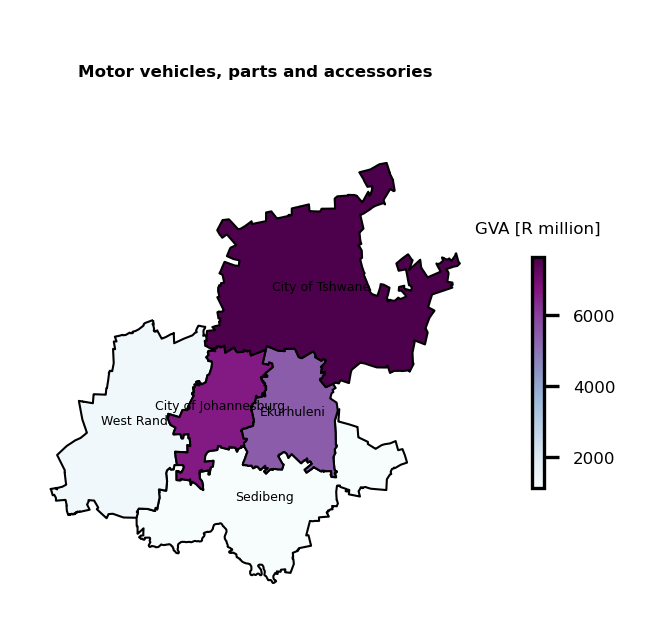

In [16]:
plot_maps(gautengAutosGeo, indicator="GVA", industries=industries_to_plot)


In [17]:
fig = px.treemap(gautengDF, values='gva_breakdown', path=['Industry'],
                 height=800, width=1200,
                 color='gva_breakdown',
                 color_continuous_scale='Blues')
fig.data[0].textinfo = 'label+value'
fig.data[0].texttemplate = '%{label}<br>Value: %{value}%<br>'
fig.update_traces(textfont = dict(color = 'black', size = 14, family = 'Arial'))
fig.update_coloraxes(colorbar_title_text = 'GVA Breakdown (%)')
fig.update_layout(margin = dict(t = 10, b = 10, r = 10, l = 10))

fig.show()

# Steel making analysis

In [18]:
industries_to_plot = ['Basic iron and steel products; casting of metal',
       'Structural metal products',
       'Other fabricated metal products']

steelGVApvt = districtDF[(districtDF.Industry.isin(industries_to_plot))].pivot(columns='Industry', values='GVA')
# steelGVApvt

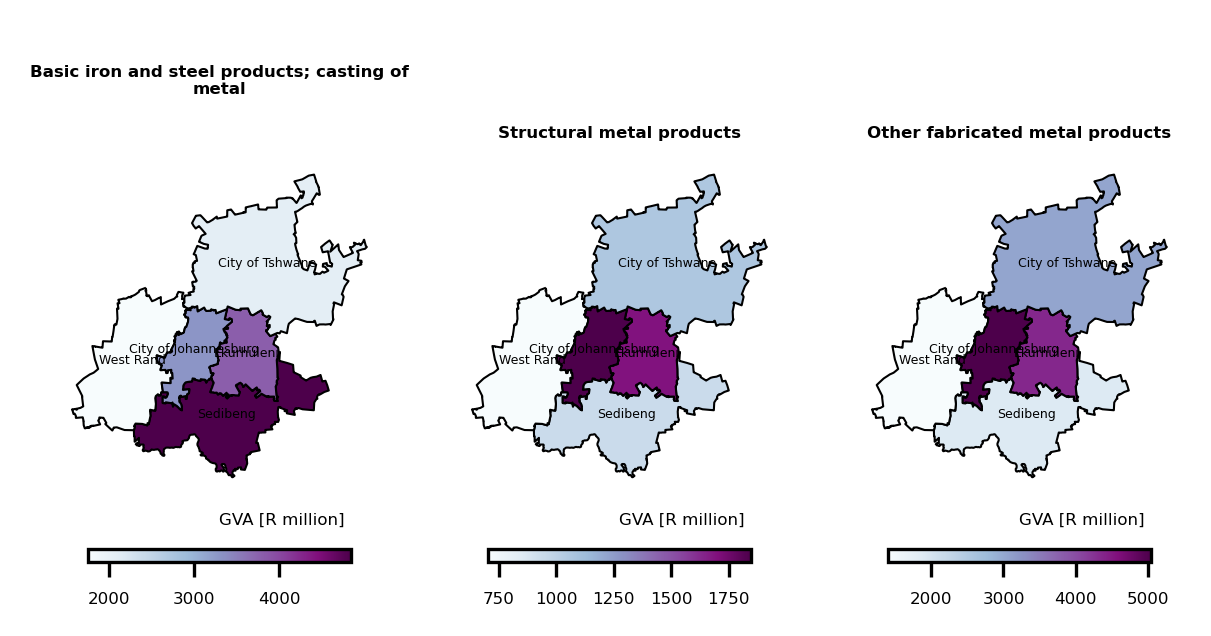

In [19]:
steelGVAGeo = gpd.GeoDataFrame(pd.concat([zaf_geo_df, steelGVApvt], axis=1)).reset_index().dropna()
gautengSteelGeo = steelGVAGeo[steelGVAGeo.PROVINCE == 'GT']
plot_maps(gautengSteelGeo , indicator="GVA", industries=industries_to_plot)

In [26]:
nationalDF[nationalDF.Industry.isin(industries_to_plot)]

,Industry,Output,GVA,output_breakdown,gva_breakdown
DISTRICT_N,,,,,
South Africa,Basic iron and steel products; casting of metal,105848.0,29807.0,0.729,0.450
South Africa,Structural metal products,43985.0,13942.0,0.303,0.210
South Africa,Other fabricated metal products,100169.0,34088.0,0.690,0.514


In [10]:
zaf_provinces = gpd.read_file(r"C:\Users\VuyoMbam\Desktop\geopandas_code\MDB_Local_Municipal_Boundary_2018.geojson")

In [ ]:
zaf_provinces.loc[:, ["PROVINCE", ]]

,FID,OBJECTID,PROVINCE,CATEGORY,CAT2,CAT_B,MUNICNAME,NAMECODE,MAP_TITLE,DISTRICT,DISTRICT_N,DATE,Shape__Area,Shape__Length,geometry
0,1,197,WC,B,Local Municipality,WC032,Overstrand,Overstrand (WC032),Overstrand Local Municipality,DC3,Overberg,2019-06-25 00:00:00+00:00,2.470202e+09,503100.219054,"MULTIPOLYGON (((19.41807 -34.68668, 19.41807 -..."
1,2,138,WC,B,Local Municipality,WC033,Cape Agulhas,Cape Agulhas (WC033),Cape Agulhas Local Municipality,DC3,Overberg,2019-06-25 00:00:00+00:00,5.121204e+09,510469.485052,"POLYGON ((20.06351 -34.21699, 20.06491 -34.233..."
2,3,160,WC,B,Local Municipality,WC031,Theewaterskloof,Theewaterskloof (WC031),Theewaterskloof Local Municipality,DC3,Overberg,2019-06-25 00:00:00+00:00,4.774032e+09,407619.924636,"POLYGON ((19.29740 -33.88968, 19.31055 -33.913..."
3,4,142,WC,B,Local Municipality,WC043,Mossel Bay,Mossel Bay (WC043),Mossel Bay Local Municipality,DC4,Garden Route,2019-06-25 00:00:00+00:00,2.921636e+09,361538.907987,"POLYGON ((22.12817 -33.85624, 22.13423 -33.869..."
4,5,141,WC,B,Local Municipality,WC042,Hessequa,Hessequa (WC042),Hessequa Local Municipality,DC4,Garden Route,2019-06-25 00:00:00+00:00,8.388296e+09,609407.058375,"POLYGON ((21.74781 -33.81114, 21.74785 -33.811..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,209,208,LIM,B,Local Municipality,LIM345,Collins Chabane,Collins Chabane (LIM345),Collins Chabane Local Municipality,DC34,Vhembe,2019-06-25 00:00:00+00:00,5.931389e+09,612925.637183,"POLYGON ((31.34490 -22.53453, 31.34739 -22.542..."
209,210,206,LIM,B,Local Municipality,LIM343,Thulamela,Thulamela (LIM343),Thulamela Local Municipality,DC34,Vhembe,2019-06-25 00:00:00+00:00,3.122493e+09,352761.996820,"POLYGON ((30.91065 -22.47558, 30.91192 -22.475..."
210,211,200,LIM,B,Local Municipality,LIM351,Blouberg,Blouberg (LIM351),Blouberg Local Municipality,DC35,Capricorn,2019-06-25 00:00:00+00:00,1.130638e+10,568573.089745,"POLYGON ((28.87529 -22.44745, 28.87730 -22.447..."
211,212,205,LIM,B,Local Municipality,LIM341,Musina,Musina (LIM341),Musina Local Municipality,DC34,Vhembe,2019-06-25 00:00:00+00:00,1.217129e+10,820095.819612,"POLYGON ((29.67528 -22.13901, 29.67583 -22.139..."
